In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['OMP_NUM_THREADS'] = '7'

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [99]:
wine=pd.read_csv(r'C:\Users\pvans\Downloads\archive\winequality-red.csv')

# Data Cleaning and processing


In [100]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
wine['category'] = (wine['quality'] >= 7).astype(int) # 3,4,5,6=False  7,8=True
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [102]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
category                0
dtype: int64

In [103]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  category              1599 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


# EDA

<Axes: >

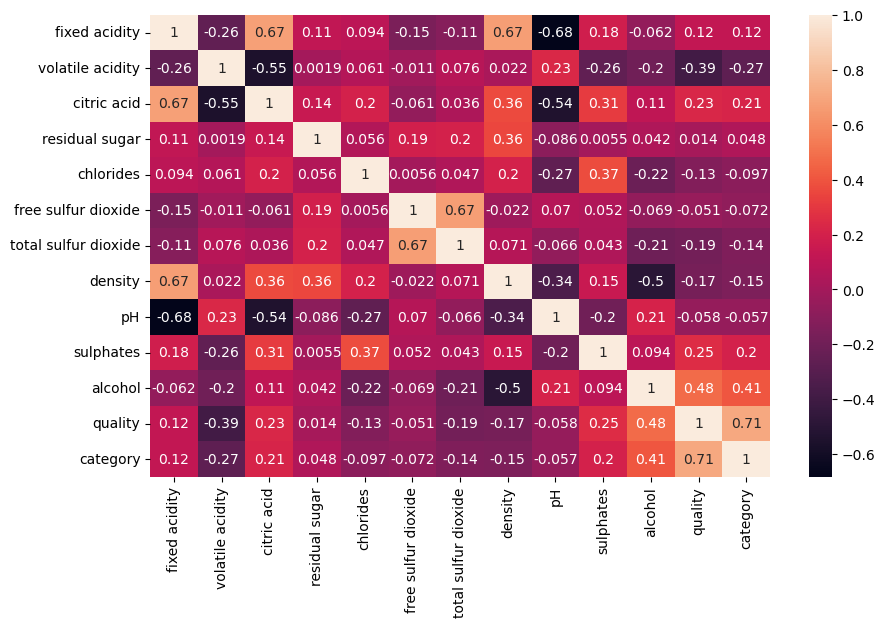

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(wine.corr(numeric_only=True) , annot = True )

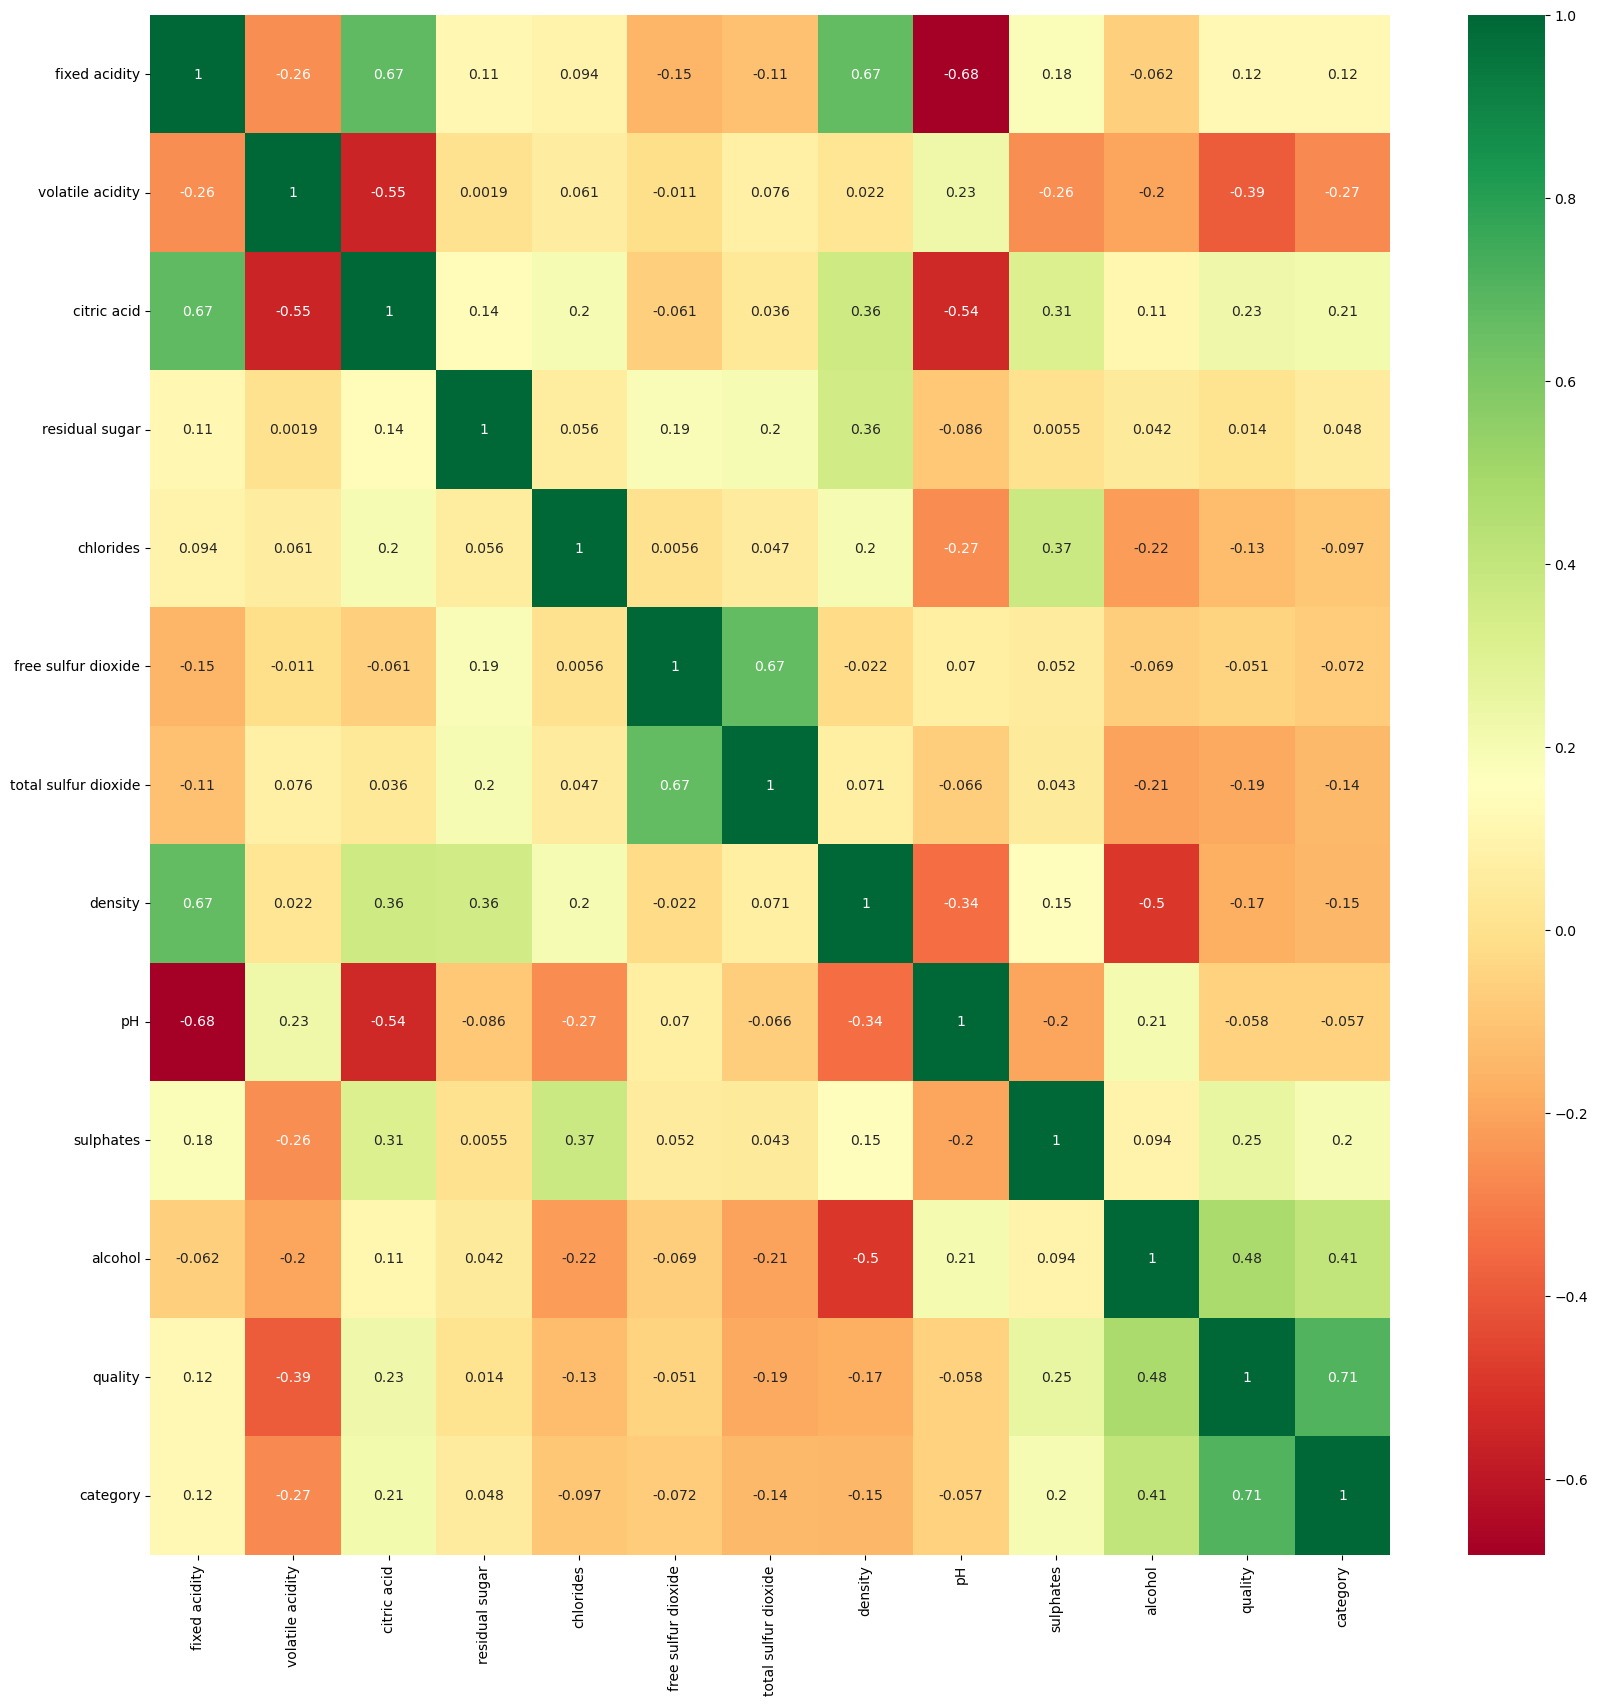

In [90]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = wine.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(wine[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Model

# ADABOOST

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = wine[wine.columns[0:10]].values
y = wine['category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

pre=ada.predict(X_test)


ada_acc = accuracy_score( pre,y_test)
print("Accuracy: " + "{:.1%}".format(ada_acc))

from sklearn.metrics import classification_report
report = classification_report(y_test, pre)
print(report)

Accuracy: 86.5%
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       346
           1       0.50      0.31      0.39        54

    accuracy                           0.86       400
   macro avg       0.70      0.63      0.66       400
weighted avg       0.85      0.86      0.85       400



In [92]:
ada.feature_importances_

array([0.12, 0.16, 0.08, 0.08, 0.08, 0.06, 0.12, 0.16, 0.02, 0.12])

# GRADIENT

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = wine[wine.columns[0:10]].values
y = wine['category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)


gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pre=gb.predict(X_test)

gb_acc = accuracy_score(pre,y_test)
print("Accuracy: " + "{:.1%}".format(gb_acc))

from sklearn.metrics import classification_report
report = classification_report(y_test, pre)
print(report)

Accuracy: 87.0%
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       346
           1       0.54      0.24      0.33        54

    accuracy                           0.87       400
   macro avg       0.72      0.60      0.63       400
weighted avg       0.84      0.87      0.85       400



In [193]:
gb.feature_importances_

array([0.09872344, 0.12407393, 0.08343499, 0.08240226, 0.05068999,
       0.04534233, 0.13081253, 0.20405374, 0.00943955, 0.17102725])

# XGBOOST

In [103]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = wine[wine.columns[0:10]].values
y = wine['category'].values
#y = y - 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pre=xgb.predict(X_test)

xgb_acc = accuracy_score(pre,y_test)
print("Accuracy: " + "{:.1%}".format(xgb_acc))

from sklearn.metrics import classification_report
report = classification_report(y_test, pre, zero_division=1)
print(report)

Accuracy: 91.8%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       346
           1       0.74      0.59      0.66        54

    accuracy                           0.92       400
   macro avg       0.84      0.78      0.81       400
weighted avg       0.91      0.92      0.91       400



In [100]:
xgb.feature_importances_

array([0.120065  , 0.11889974, 0.10346801, 0.10872088, 0.06329299,
       0.08606508, 0.08724054, 0.12179232, 0.06095868, 0.12949675],
      dtype=float32)

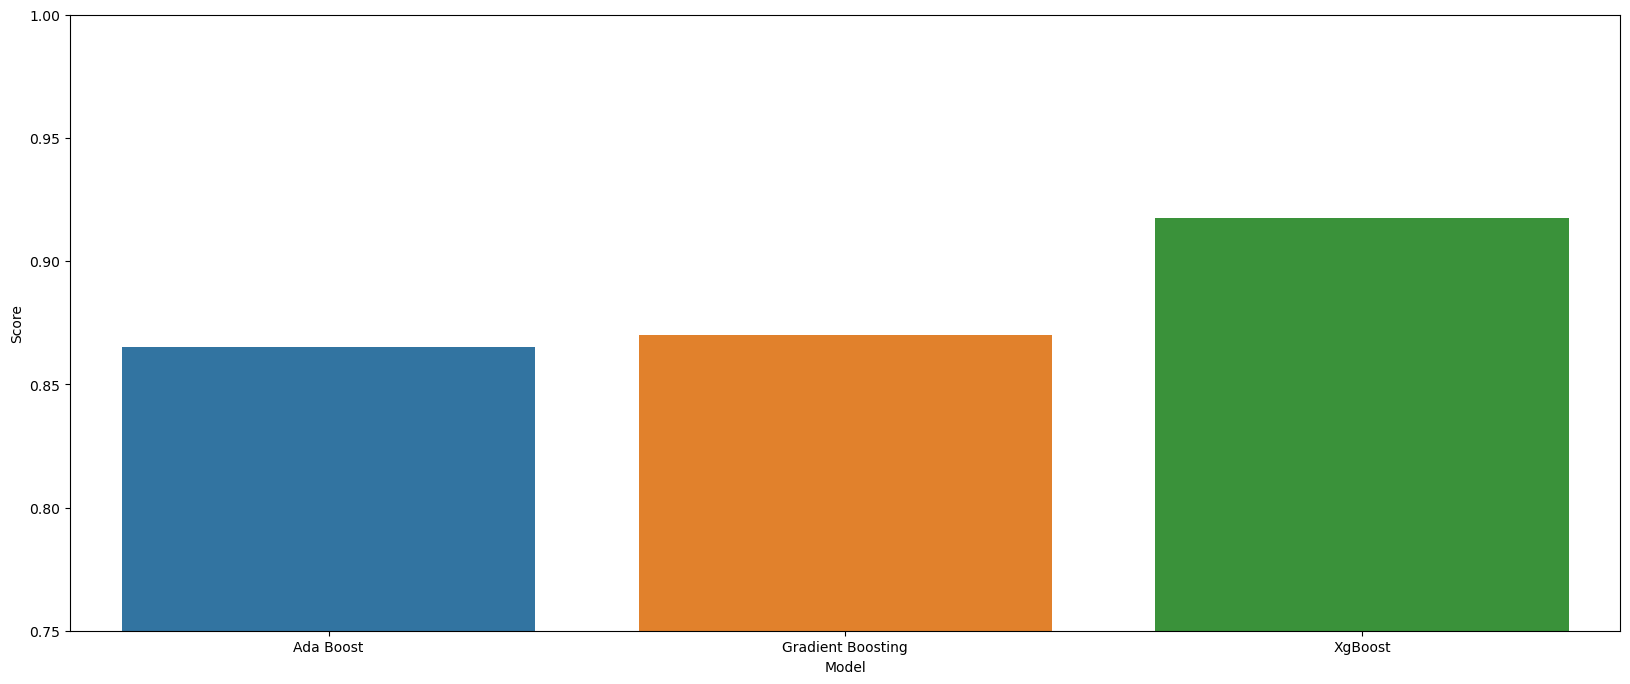

In [105]:
models = pd.DataFrame({
    'Model' : ['Ada Boost',
             'Gradient Boosting',  'XgBoost'],
    'Score' : [ada_acc,gb_acc,xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

plt.figure(figsize = (20, 8))

g=sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim( 0.75,1.0)
plt.show(g)

In [195]:
xgb.feature_importances_

array([0.09378631, 0.15460671, 0.06949593, 0.08125341, 0.07034026,
       0.09454177, 0.08014116, 0.12705024, 0.06799956, 0.16078468],
      dtype=float32)

In [97]:
import pickle
pickle.dump(xgb,open('modelEn.pkl','wb'))

In [68]:
model=pickle.load(open('modelEn.pkl','rb'))

In [87]:
model.predict((X_train[25]).reshape(1,-1))

array([1])

In [82]:
y_train[25]

True

# Clustering

# KMEANS

C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

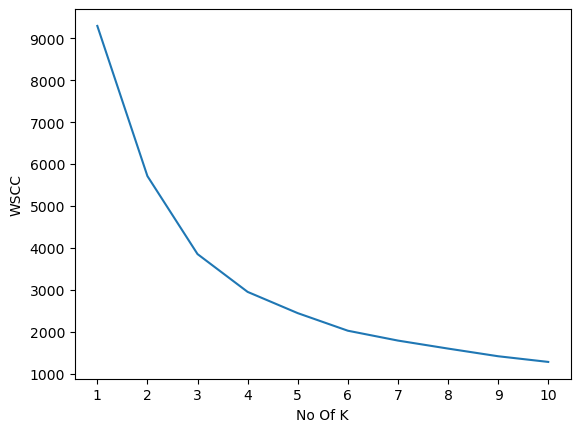

C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


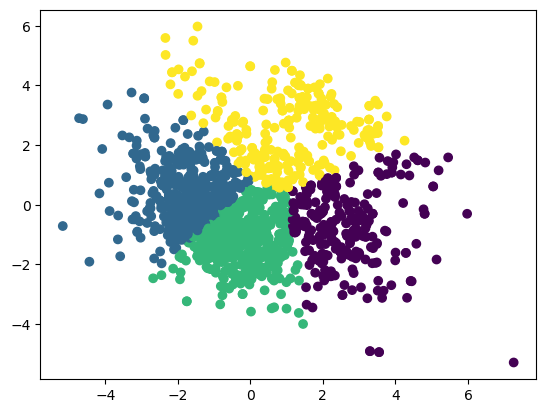

In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

scaler=StandardScaler()
seg=scaler.fit_transform(wine)
pca=PCA(n_components=2)
pca.fit(seg)
score_pca=pca.transform(seg)

# from sklearn.model_selection import train_test_split
# X = wine[wine.columns[0:10]].values
# y = wine['category'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#elbow to select k value
wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k,init='k-means++', n_init=10)
    kmean.fit(score_pca)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No Of K")
plt.ylabel("WSCC")
plt.show()

kmean=KMeans(n_clusters=4,init='k-means++')
y_labels=kmean.fit_predict(score_pca)

plt.scatter(score_pca[:,0],score_pca[:,1],c=y_labels)


In [29]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


In [32]:
from kneed import KneeLocator

In [38]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

4

C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\pvans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

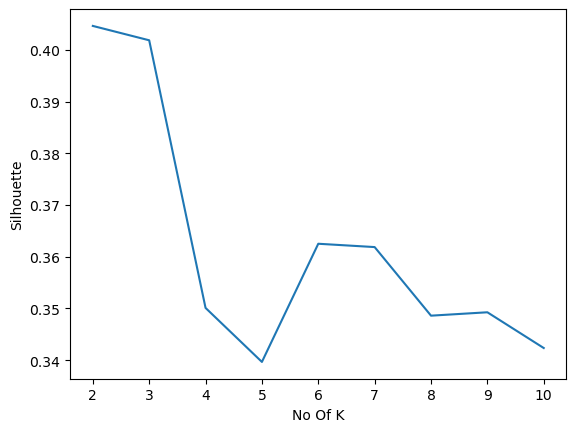

In [97]:
import os
os.environ['OMP_NUM_THREADS'] = '7'
from sklearn.metrics import silhouette_score 

silhouette_coefficients=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init='k-means++', n_init=10)
    kmean.fit(score_pca)
    score=silhouette_score(score_pca,kmean.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No Of K")
plt.ylabel("Silhouette")
plt.show()

# HIERARICHAL

In [109]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

scaler=StandardScaler()
seg=scaler.fit_transform(wine)
pca=PCA(n_components=3)
pca.fit(seg)
score_pca=pca.transform(seg)
#plt.scatter(score_pca[:,0],score_pca[:,1])

Text(0.5, 1.0, 'Dendogram')

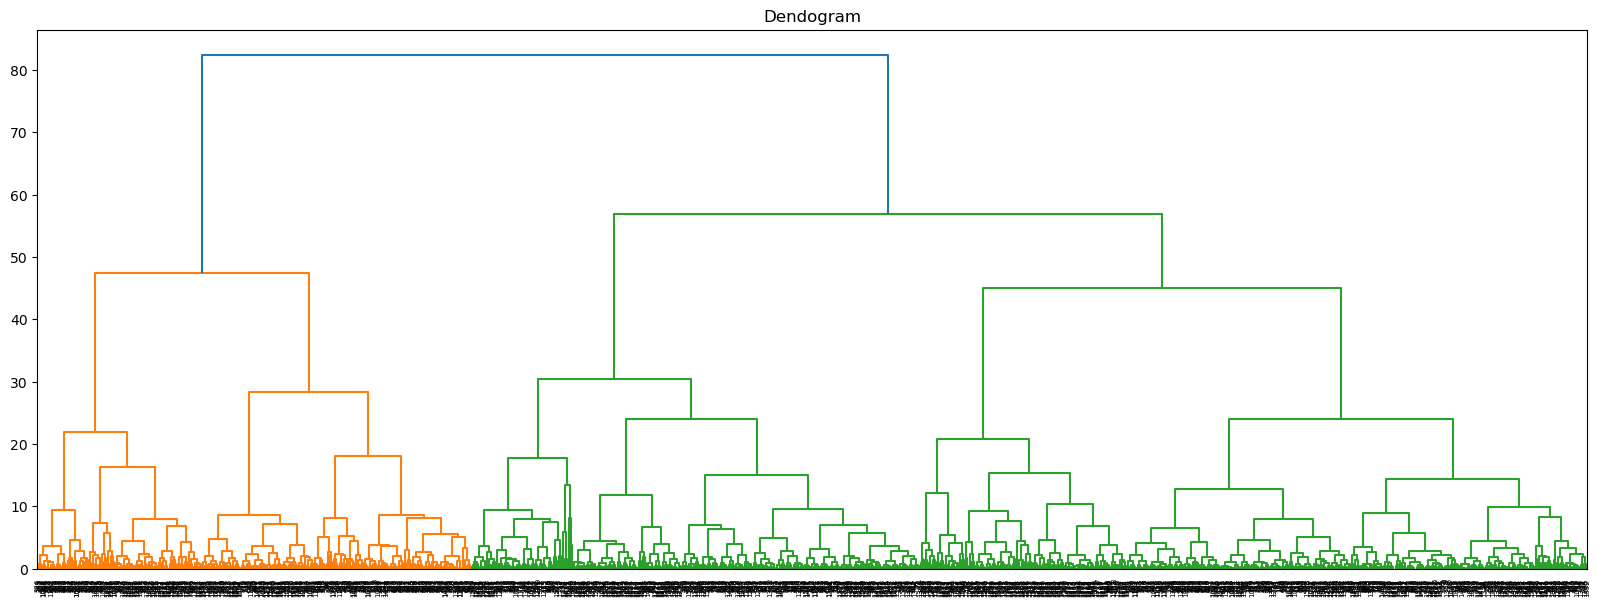

In [110]:
#agglomerative
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(score_pca,method='ward'))
plt.title("Dendogram")

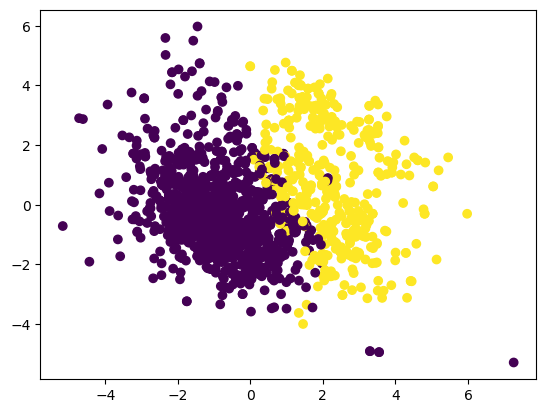

In [111]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(score_pca)

cluster.labels_
plt.scatter(score_pca[:,0],score_pca[:,1],c=cluster.labels_)

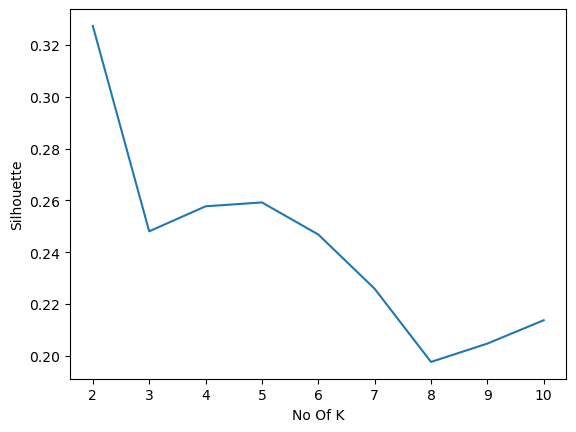

In [113]:
from sklearn.metrics import silhouette_score 

silhouette_coefficients=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(score_pca)
    score=silhouette_score(score_pca,agglo.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No Of K")
plt.ylabel("Silhouette")
plt.show()

# DBSCAN

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

scaler=StandardScaler()
seg=scaler.fit_transform(wine)
pca=PCA(n_components=3)
pca.fit(seg)
score_pca=pca.transform(seg)


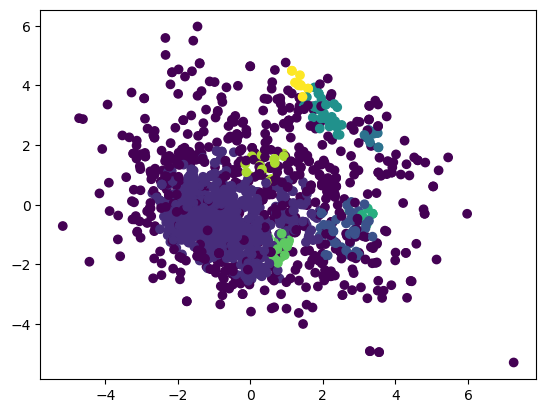

In [116]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.5,min_samples=10)
dbscan.fit(score_pca)

dbscan.labels_
plt.scatter(score_pca[:,0],score_pca[:,1],c=dbscan.labels_)